### Importing Relevant Libraries

In [ ]:
## Importing relevant libraries

import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Machine Learning Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
import lightgbm as lgb

# stop warnings
import warnings
warnings.filterwarnings('ignore')

### Loading the Dataset

In [ ]:
# loading the data with income information

income_data = pd.read_excel('data\existing-customers.xlsx')
print(income_data.shape)
income_data.head()

(32561, 15)


,RowID,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,Row0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,Row1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,Row2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,Row3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,Row4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Data Exploration and Preprocessing

In [ ]:
# removing RowID as it is a redundant column

income_data = income_data.drop(['RowID'], axis=1)
print(income_data.shape)

(32561, 14)


In [ ]:
# checking for missing values and data types

income_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      30718 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  31978 non-null  object
 13  class           32561 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


workclass has 5.64% missing values
occupation has 5.66% missing values
native-country has 1.79% missing values


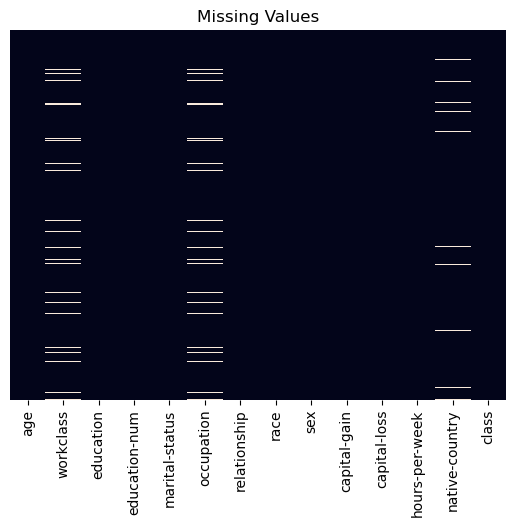

In [ ]:
# checking for missing values
# printing columns with missing values and their percentage
for col in income_data.columns:
    if income_data[col].isnull().sum() > 0:
        print(f'{col} has {round(income_data[col].isnull().sum()/len(income_data[col])*100, 2)}% missing values')

# plotting the missing values
sns.heatmap(income_data.isnull(), cbar=False)
plt.title('Missing Values')
plt.yticks([])
plt.show()

In [ ]:
# using mode to fill missing values, as all the columns with missing values are categorical

income_data['workclass'] = income_data['workclass'].fillna(income_data['workclass'].mode()[0])
income_data['occupation'] = income_data['occupation'].fillna(income_data['occupation'].mode()[0])
income_data['native-country'] = income_data['native-country'].fillna(income_data['native-country'].mode()[0])

print('{} missing values left.'.format(income_data.isnull().sum().sum()))

0 missing values left.


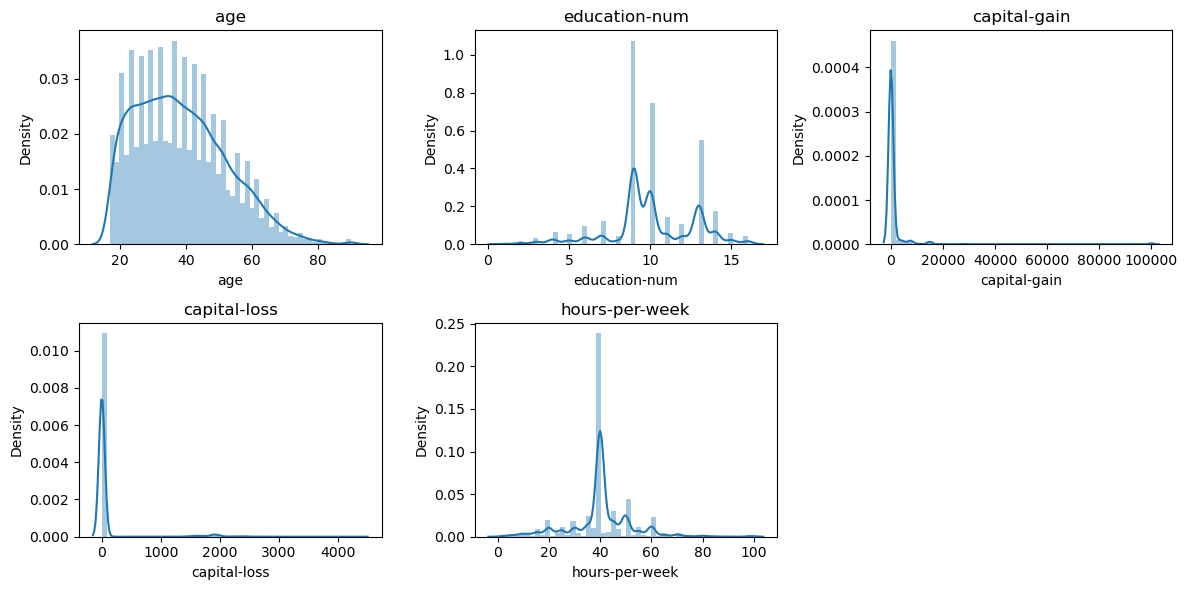

In [ ]:
# data distribution in the numerical columns

numerical_cols = income_data.select_dtypes(include=['int64', 'float64']).columns

fig, ax = plt.subplots(2, 3, figsize=(12, 6))

for i, col in enumerate(numerical_cols):
    sns.distplot(income_data[col], ax=ax[i//3, i%3])
    ax[i//3, i%3].set_title(col)

for i in range(len(numerical_cols), 6):
    fig.delaxes(ax[i//3, i%3])

plt.tight_layout()
plt.show()

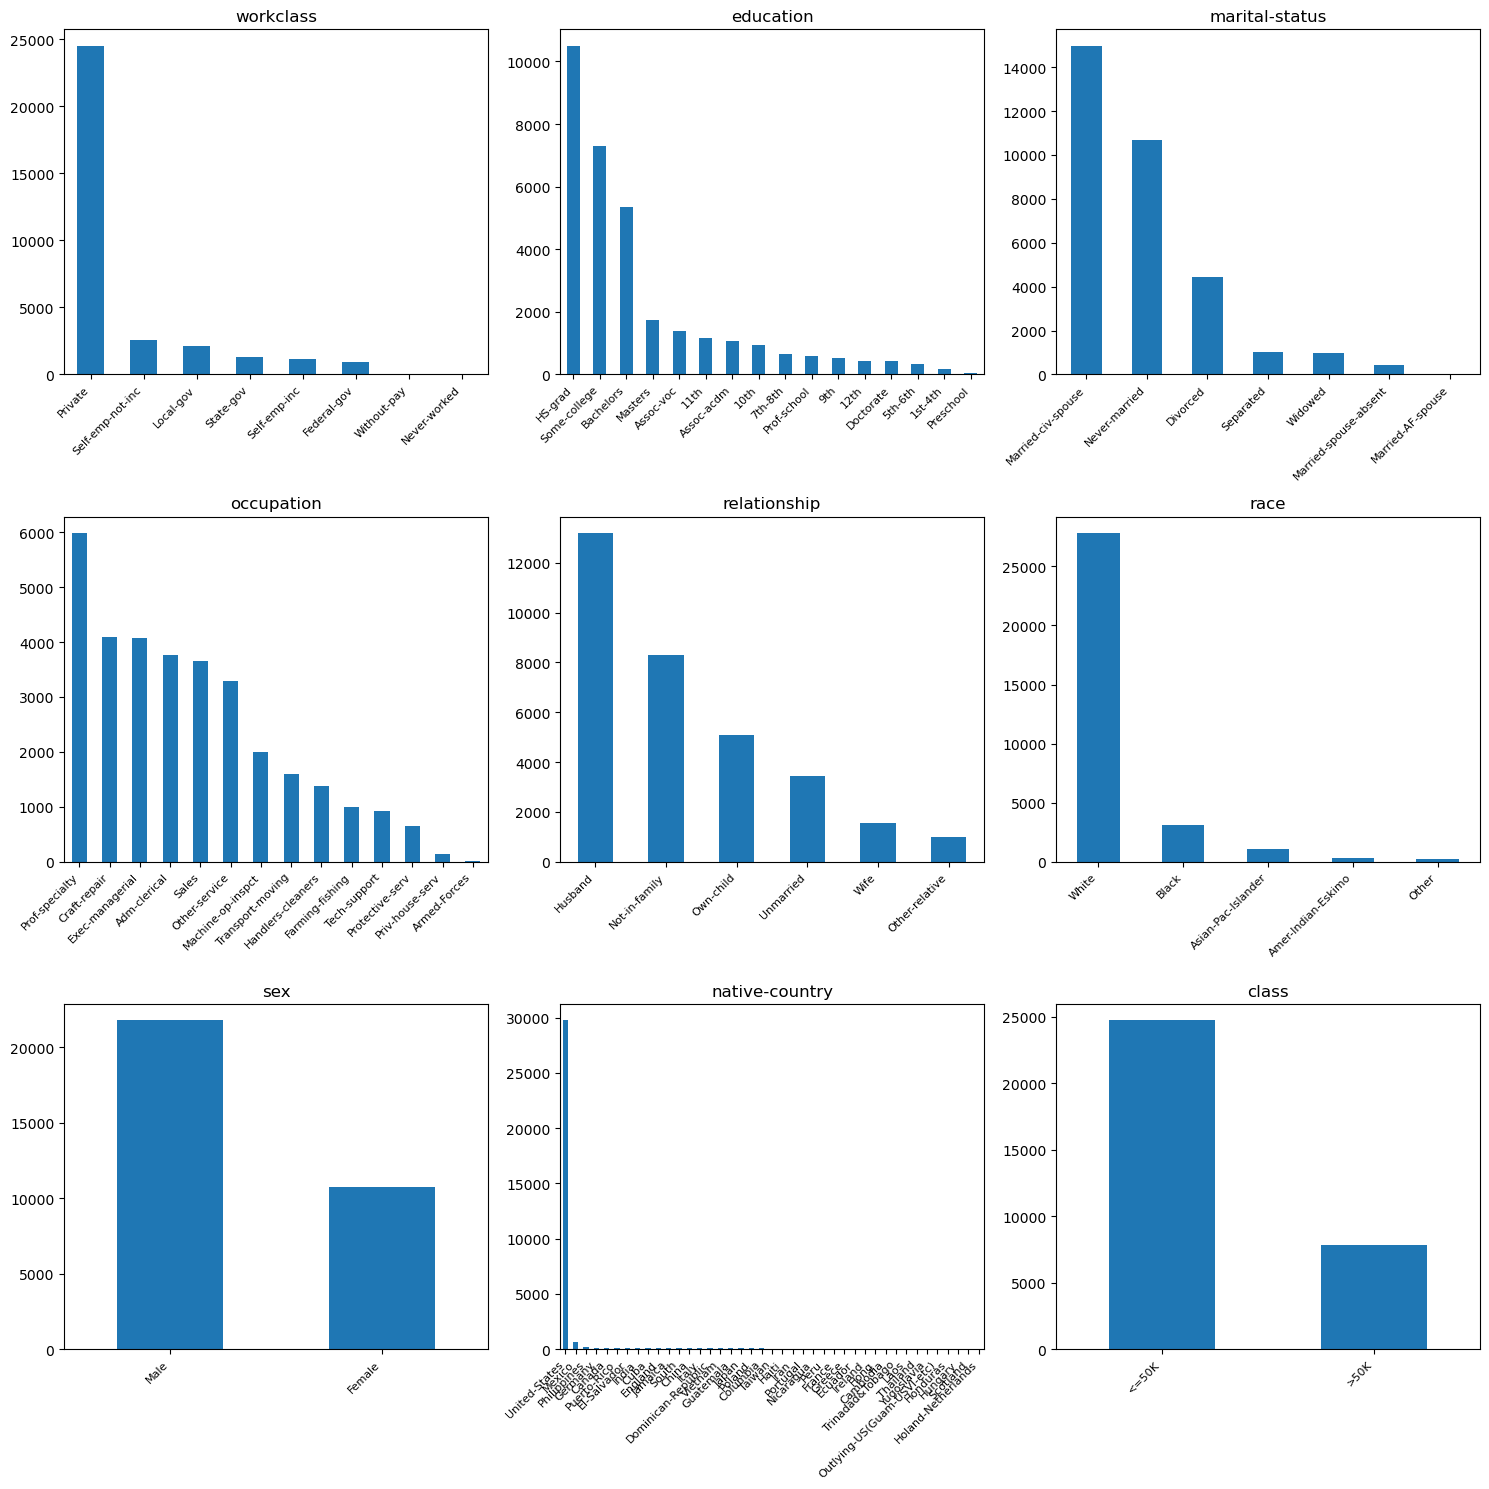

In [ ]:
# data distribution in the categorical columns

categorical_cols = income_data.select_dtypes(include=['object']).columns

# plotting the categorical columns
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
for i, col in enumerate(categorical_cols):
    income_data[col].value_counts().plot(kind='bar', ax=ax[i//3, i%3])
    ax[i//3, i%3].set_title(col)
    ax[i//3, i%3].set_xticklabels(income_data[col].value_counts().index, rotation=45, size=8, ha='right')

for i in range(len(categorical_cols), 9):
    fig.delaxes(ax[i//3, i%3])

plt.tight_layout()
plt.show()

In [ ]:
# unique values in each cateforical column

for col in categorical_cols:
    print(f'{col} has {income_data[col].nunique()} unique values.')

workclass has 8 unique values.
education has 16 unique values.
marital-status has 7 unique values.
occupation has 14 unique values.
relationship has 6 unique values.
race has 5 unique values.
sex has 2 unique values.
native-country has 41 unique values.
class has 2 unique values.


In [ ]:
# declaring the features and target

X = income_data.drop(['class'], axis=1)
y = income_data['class']

print(X.shape, y.shape)

(32561, 13) (32561,)


In [ ]:
# splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(26048, 13) (26048,)
(6513, 13) (6513,)


In [ ]:
# changing all values of native-country to USA and Non-USA

X_train['native-country'] = X_train['native-country'].apply(lambda x: 'USA' if x == 'United-States' else 'Non-USA')
X_test['native-country'] = X_test['native-country'].apply(lambda x: 'USA' if x == 'United-States' else 'Non-USA')

In [ ]:
# dummy encoding the categorical columns

X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

missing_cols = set(X_train.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0

X_test = X_test[X_train.columns]

print(X_train.shape, X_test.shape)

(26048, 57) (6513, 57)


In [ ]:
# scaling the data

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Grid Search Cross Validation 

In [ ]:
# grid search for the optimal Logisting Regression model

params = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']}

grid = GridSearchCV(estimator=LogisticRegression(), param_grid=params, verbose=True, cv=5, n_jobs=-1, scoring='accuracy')
grid.fit(X_train, y_train)
print(grid.best_estimator_)
print(grid.best_score_)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
LogisticRegression(C=1000)
0.8497774669487219


In [ ]:
# grid search for the optimal KNeighbors Classifier

params = {'n_neighbors': [3, 5, 7, 9, 15, 21, 25]}

grid = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=params, verbose=True, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid.best_estimator_)
print(grid.best_score_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
KNeighborsClassifier(n_neighbors=25)
0.8330389857507068


In [ ]:
# grid search for the optimal SVC

params = {'C': [0.1, 1, 10],
          'gamma': [1, 0.1, 0.01]}

grid = GridSearchCV(estimator=SVC(), param_grid=params, verbose=True, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid.best_estimator_)
print(grid.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVC(C=10, gamma=0.1)
0.8478194281343121


In [ ]:
# grid search for the optimal Gaussian Naive Bayes

params = {'var_smoothing': [1e-3, 1e-2, 1e-1]}

grid = GridSearchCV(estimator=GaussianNB(), param_grid=params, verbose=True, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid.best_estimator_)
print(grid.best_score_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
GaussianNB(var_smoothing=0.1)
0.7620931364547335


In [ ]:
# grid search for the optimal Decision Tree Classifier

params = {"splitter":["best", "random"],
          "max_depth" : [1, 3, 5, 7, 9],
          "min_samples_leaf":[1, 2, 3, 5, 7]}

grid = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=params, verbose=True, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid.best_estimator_)
print(grid.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
DecisionTreeClassifier(max_depth=9, min_samples_leaf=5)
0.8565343166209083


In [ ]:
# grid search for the optimal Random Forest Classifier

params = {'max_depth': [5, 10, 20, None],
          'n_estimators': [100, 500, 1000]}

grid = GridSearchCV(estimator=RandomForestClassifier(), param_grid=params, verbose=1, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid.best_estimator_)
print(grid.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
RandomForestClassifier(max_depth=20, n_estimators=1000)
0.8596824409546595


In [ ]:
# grid search for the optimal Gradient Boosting Classfier

params = {'max_depth': [5, 10, 20, None],
          'n_estimators': [100, 500, 1000]}

grid = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=params, verbose=1, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid.best_estimator_)
print(grid.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
GradientBoostingClassifier(max_depth=5)
0.8691263938945182


In [ ]:
# grid search for the optimal XGBoost Classifier

y_train_xgb = y_train.map({'<=50K': 0, '>50K': 1})
y_test_xgb = y_test.map({'<=50K': 0, '>50K': 1})

params = {'max_depth': [5, 10, None],
            'n_estimators': [100, 500]}

grid = GridSearchCV(estimator=xgb.XGBClassifier(), param_grid=params, verbose=1, cv=5, n_jobs=-1)
grid.fit(X_train, y_train_xgb)
print(grid.best_estimator_)
print(grid.best_score_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
0.8700478612058195


In [ ]:
# grid search for the optimal Perceptron Classifier

params = {'penalty': ['l1', 'l2', 'elasticnet'],
            'alpha': [0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(estimator=Perceptron(), param_grid=params, verbose=1, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid.best_estimator_)
print(grid.best_score_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Perceptron(alpha=0.01, penalty='elasticnet')
0.7865087923640208


In [ ]:
# grid search for the optimal MLP Classifier

params = {'hidden_layer_sizes': [(32, 32), (32, 16), (32,), (16, 16), (16,)],
            'activation': ['relu'], 
            'solver': ['adam'],
            'alpha': [0.001, 0.01, 0.1],
            'learning_rate': ['constant', 'adaptive']}

grid = GridSearchCV(estimator=MLPClassifier(), param_grid=params, verbose=1, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid.best_estimator_)
print(grid.best_score_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
MLPClassifier(alpha=0.1, hidden_layer_sizes=(16, 16), learning_rate='adaptive')
0.8527719446152735


In [ ]:
# grid search for the optimal SGD Classifier

params = {'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
          'penalty': ['l1', 'l2', 'elasticnet'],
          'alpha': [0.001, 0.01, 0.1]}

grid = GridSearchCV(estimator=SGDClassifier(), param_grid=params, verbose=1, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid.best_estimator_)
print(grid.best_score_)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
SGDClassifier(alpha=0.001, loss='modified_huber', penalty='l1')
0.8436734958577894


In [ ]:
# grid search for the optimal lightgbm Classifier

params = {'num_leaves': [31, 63, 127],
            'max_depth': [5, 10, 20],
            'n_estimators': [100, 500]}

grid = GridSearchCV(estimator=lgb.LGBMClassifier(), param_grid=params, verbose=1, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid.best_estimator_)
print(grid.best_score_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
LGBMClassifier(max_depth=20)
0.8710460081455063


### Lazy Predictor

This will be a quick analysis of different models on the dataset. I will be using the LazyPredict library to get a quick overview of the performance of different models. From here we might be able to get a good idea of which models to use for further analysis.

In [ ]:
# install lazy predict

! pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# lazy prediction

from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [03:35<00:00,  7.44s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.88,0.81,None,0.88,0.73
NearestCentroid,0.79,0.81,None,0.80,0.23
BernoulliNB,0.82,0.79,None,0.82,0.35
AdaBoostClassifier,0.86,0.78,None,0.86,3.03
RandomForestClassifier,0.85,0.77,None,0.85,3.78
LogisticRegression,0.86,0.77,None,0.85,0.99
CalibratedClassifierCV,0.85,0.77,None,0.85,26.71
LinearSVC,0.85,0.76,None,0.85,9.48
BaggingClassifier,0.84,0.76,None,0.83,1.50


### Models' Comparison

In [ ]:
comparison_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Recall', 'Precision'])
comparison_df

,Model,Accuracy,Recall,Precision


In [ ]:
# logistic regression

logreg = LogisticRegression(C=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
acc_log = round(accuracy_score(y_test, y_pred) * 100, 2)
rec_log = round(recall_score(y_test, y_pred, average='macro') * 100, 2)
pre_log = round(precision_score(y_test, y_pred, average='macro') * 100, 2)

comparison_df = comparison_df.append({'Model': 'Logistic Regression', 'Accuracy': acc_log,
                                      'Recall': rec_log, 'Precision': pre_log}, ignore_index=True)
                                      
comparison_df[comparison_df['Model'] == 'Logistic Regression']

,Model,Accuracy,Recall,Precision
0,Logistic Regression,85.58,77.17,81.46


In [ ]:
# KNN

knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc_knn = round(accuracy_score(y_test, y_pred) * 100, 2)
rec_knn = round(recall_score(y_test, y_pred, average='macro') * 100, 2)
pre_knn = round(precision_score(y_test, y_pred, average='macro') * 100, 2)

comparison_df = comparison_df.append({'Model': 'KNN', 'Accuracy': acc_knn,
                                        'Recall': rec_knn, 'Precision': pre_knn}, ignore_index=True)

comparison_df[comparison_df['Model'] == 'KNN']

,Model,Accuracy,Recall,Precision
1,KNN,83.46,74.67,77.97


In [ ]:
# SVC

svc = SVC(C=10, gamma=0.1)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
acc_svc = round(accuracy_score(y_test, y_pred) * 100, 2)
rec_svc = round(recall_score(y_test, y_pred, average='macro') * 100, 2)
pre_svc = round(precision_score(y_test, y_pred, average='macro') * 100, 2)

comparison_df = comparison_df.append({'Model': 'SVC', 'Accuracy': acc_svc,
                                        'Recall': rec_svc, 'Precision': pre_svc}, ignore_index=True)

comparison_df[comparison_df['Model'] == 'SVC']

,Model,Accuracy,Recall,Precision
2,SVC,85.55,76.67,81.67


In [ ]:
## Gaussian Naive Bayes

gaussian = GaussianNB(var_smoothing=0.1)
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
acc_gaussian = round(accuracy_score(y_test, y_pred) * 100, 2)
rec_gaussian = round(recall_score(y_test, y_pred, average='macro') * 100, 2)
pre_gaussian = round(precision_score(y_test, y_pred, average='macro') * 100, 2)

comparison_df = comparison_df.append({'Model': 'Gaussian Naive Bayes', 'Accuracy': acc_gaussian,
                                        'Recall': rec_gaussian, 'Precision': pre_gaussian}, ignore_index=True)

comparison_df[comparison_df['Model'] == 'Gaussian Naive Bayes']

,Model,Accuracy,Recall,Precision
3,Gaussian Naive Bayes,76.91,79.46,72.53


In [ ]:
# Decision Tree

decision_tree = DecisionTreeClassifier(max_depth=9, min_samples_leaf=5)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(accuracy_score(y_test, y_pred) * 100, 2)
rec_decision_tree = round(recall_score(y_test, y_pred, average='macro') * 100, 2)
pre_decision_tree = round(precision_score(y_test, y_pred, average='macro') * 100, 2)

comparison_df = comparison_df.append({'Model': 'Decision Tree', 'Accuracy': acc_decision_tree,
                                        'Recall': rec_decision_tree, 'Precision': pre_decision_tree}, ignore_index=True)

comparison_df[comparison_df['Model'] == 'Decision Tree']

,Model,Accuracy,Recall,Precision
4,Decision Tree,85.72,76.11,82.49


In [ ]:
# Random Forest

random_forest = RandomForestClassifier(max_depth=20, n_estimators=1000)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
acc_random_forest = round(accuracy_score(y_test, y_pred) * 100, 2)
rec_random_forest = round(recall_score(y_test, y_pred, average='macro') * 100, 2)
pre_random_forest = round(precision_score(y_test, y_pred, average='macro') * 100, 2)

comparison_df = comparison_df.append({'Model': 'Random Forest', 'Accuracy': acc_random_forest,
                                        'Recall': rec_random_forest, 'Precision': pre_random_forest}, ignore_index=True)

comparison_df[comparison_df['Model'] == 'Random Forest']

,Model,Accuracy,Recall,Precision
5,Random Forest,86.38,77.54,83.2


In [ ]:
# Gradient Boosting

gradient_boosting = GradientBoostingClassifier(max_depth=5)
gradient_boosting.fit(X_train, y_train)
y_pred = gradient_boosting.predict(X_test)
acc_gradient_boosting = round(accuracy_score(y_test, y_pred) * 100, 2)
rec_gradient_boosting = round(recall_score(y_test, y_pred, average='macro') * 100, 2)
pre_gradient_boosting = round(precision_score(y_test, y_pred, average='macro') * 100, 2)

comparison_df = comparison_df.append({'Model': 'Gradient Boosting', 'Accuracy': acc_gradient_boosting,
                                        'Recall': rec_gradient_boosting, 'Precision': pre_gradient_boosting}, ignore_index=True)

comparison_df[comparison_df['Model'] == 'Gradient Boosting']

,Model,Accuracy,Recall,Precision
6,Gradient Boosting,87.92,80.64,84.94


In [ ]:
# XGBoost

y_train_xgb = y_train.map({'<=50K': 0, '>50K': 1})
y_test_xgb = y_test.map({'<=50K': 0, '>50K': 1})

xgboost = xgb.XGBClassifier(max_depth=5, n_estimators=100)
xgboost.fit(X_train, y_train_xgb)
y_pred = xgboost.predict(X_test)
acc_xgboost = round(accuracy_score(y_test_xgb, y_pred) * 100, 2)
rec_xgboost = round(recall_score(y_test_xgb, y_pred, average='macro') * 100, 2)
pre_xgboost = round(precision_score(y_test_xgb, y_pred, average='macro') * 100, 2)

comparison_df = comparison_df.append({'Model': 'XGBoost', 'Accuracy': acc_xgboost,
                                        'Recall': rec_xgboost, 'Precision': pre_xgboost}, ignore_index=True)

comparison_df[comparison_df['Model'] == 'XGBoost']

,Model,Accuracy,Recall,Precision
7,XGBoost,87.56,80.54,84.15


In [ ]:
# Perceptron

perceptron = Perceptron(alpha=0.01, penalty='elasticnet')
perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)
acc_perceptron = round(accuracy_score(y_test, y_pred) * 100, 2)
rec_perceptron = round(recall_score(y_test, y_pred, average='macro') * 100, 2)
pre_perceptron = round(precision_score(y_test, y_pred, average='macro') * 100, 2)

comparison_df = comparison_df.append({'Model': 'Perceptron', 'Accuracy': acc_perceptron,
                                        'Recall': rec_perceptron, 'Precision': pre_perceptron}, ignore_index=True)

comparison_df[comparison_df['Model'] == 'Perceptron']

,Model,Accuracy,Recall,Precision
8,Perceptron,75.91,50.06,87.95


In [ ]:
# MLP Classifier

mlp = MLPClassifier(alpha=0.1, hidden_layer_sizes=(16, 16), learning_rate='adaptive')
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
acc_mlp = round(accuracy_score(y_test, y_pred) * 100, 2)
rec_mlp = round(recall_score(y_test, y_pred, average='macro') * 100, 2)
pre_mlp = round(precision_score(y_test, y_pred, average='macro') * 100, 2)

comparison_df = comparison_df.append({'Model': 'MLP Classifier', 'Accuracy': acc_mlp,
                                        'Recall': rec_mlp, 'Precision': pre_mlp}, ignore_index=True)

comparison_df[comparison_df['Model'] == 'MLP Classifier']

,Model,Accuracy,Recall,Precision
9,MLP Classifier,85.92,78.33,81.62


In [ ]:
# SGD Classifier

sgd = SGDClassifier(alpha=0.001, loss='modified_huber', penalty='l1')
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
acc_sgd = round(accuracy_score(y_test, y_pred) * 100, 2)
rec_sgd = round(recall_score(y_test, y_pred, average='macro') * 100, 2)
pre_sgd = round(precision_score(y_test, y_pred, average='macro') * 100, 2)

comparison_df = comparison_df.append({'Model': 'SGD Classifier', 'Accuracy': acc_sgd,
                                        'Recall': rec_sgd, 'Precision': pre_sgd}, ignore_index=True)

comparison_df[comparison_df['Model'] == 'SGD Classifier']

,Model,Accuracy,Recall,Precision
10,SGD Classifier,85.31,76.79,81.02


In [ ]:
# LightGBM

lgbm = lgb.LGBMClassifier(max_depth=20)
lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)
acc_lgbm = round(accuracy_score(y_test, y_pred) * 100, 2)
rec_lgbm = round(recall_score(y_test, y_pred, average='macro') * 100, 2)
pre_lgbm = round(precision_score(y_test, y_pred, average='macro') * 100, 2)

comparison_df = comparison_df.append({'Model': 'LightGBM', 'Accuracy': acc_lgbm,
                                        'Recall': rec_lgbm, 'Precision': pre_lgbm}, ignore_index=True)

comparison_df[comparison_df['Model'] == 'LightGBM']

,Model,Accuracy,Recall,Precision
11,LightGBM,87.86,80.84,84.66


In [ ]:
# model comparison

comparison_df.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,Recall,Precision
6,Gradient Boosting,87.92,80.64,84.94
11,LightGBM,87.86,80.84,84.66
7,XGBoost,87.56,80.54,84.15
5,Random Forest,86.38,77.54,83.20
9,MLP Classifier,85.92,78.33,81.62
4,Decision Tree,85.72,76.11,82.49
0,Logistic Regression,85.58,77.17,81.46
2,SVC,85.55,76.67,81.67
10,SGD Classifier,85.31,76.79,81.02
1,KNN,83.46,74.67,77.97


### Model Selection

From this comparison, we can see the performance of boosting models has been better than the rest with models like random forest, MLP Classifier, etc not very much behind. LightGBM is the model with highest accuracy and it will be selected for the model deployment and for predicting the potential customers.

In [ ]:
# full train data

X_train = X.copy()
y_train = y.copy()

In [ ]:
# load test data

deploy = pd.read_excel('data\potential-customers.xlsx')
print(deploy.shape)
deploy.head()

(16281, 14)


,RowID,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,Row0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,Row1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,Row2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,Row3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,Row4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States


In [ ]:
# checking for missing values

deploy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   RowID           16281 non-null  object
 1   age             16281 non-null  int64 
 2   workclass       15318 non-null  object
 3   education       16281 non-null  object
 4   education-num   16281 non-null  int64 
 5   marital-status  16281 non-null  object
 6   occupation      15315 non-null  object
 7   relationship    16281 non-null  object
 8   race            16281 non-null  object
 9   sex             16281 non-null  object
 10  capital-gain    16281 non-null  int64 
 11  capital-loss    16281 non-null  int64 
 12  hours-per-week  16281 non-null  int64 
 13  native-country  16007 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.7+ MB


In [ ]:
# using mode to fill missing values, as all the columns with missing values are categorical

deploy['workclass'] = deploy['workclass'].fillna(X_train['workclass'].mode()[0])
deploy['occupation'] = deploy['occupation'].fillna(X_train['occupation'].mode()[0])
deploy['native-country'] = deploy['native-country'].fillna(X_train['native-country'].mode()[0])

print('{} missing values left.'.format(deploy.isnull().sum().sum()))

0 missing values left.


In [ ]:
# dropping 'RowID' column

X_deploy = deploy.drop('RowID', axis=1)
X_deploy.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,Private,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States


In [ ]:
# USA - Non-USA

X_train['native-country'] = X_train['native-country'].apply(lambda x: 'USA' if x == 'United-States' else 'Non-USA')
X_deploy['native-country'] = X_deploy['native-country'].apply(lambda x: 'USA' if x == 'United-States' else 'Non-USA')

In [ ]:
# dummy encoding the categorical columns

X_train = pd.get_dummies(X_train, drop_first=True)
X_deploy = pd.get_dummies(X_deploy, drop_first=True)

missing_cols = set(X_train.columns) - set(X_deploy.columns)
for col in missing_cols:
    X_deploy[col] = 0

X_test = X_deploy[X_train.columns]

print(X_train.shape, X_deploy.shape)

(32561, 57) (16281, 57)


In [ ]:
# scaling the data

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_deploy = scaler.transform(X_deploy)

In [ ]:
# training the optimal found lightgbm model

lgbm = lgb.LGBMClassifier(max_depth=20)
lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_deploy)

In [ ]:
# adding the predictions to the deploy dataframe

deploy['Predicted'] = y_pred
deploy = deploy[['RowID', 'Predicted']]
deploy.head()

,RowID,Predicted
0,Row0,<=50K
1,Row1,<=50K
2,Row2,<=50K
3,Row3,>50K
4,Row4,<=50K


In [ ]:
# rowID for customers with income >50K

deploy = deploy[deploy['Predicted'] == '>50K']
deploy.shape

(3234, 2)

In [ ]:
# saving the predictions

rowID = deploy['RowID'].values
np.savetxt('rowID.txt', rowID, fmt='%s')

### Revenue Approximation

In [ ]:
# revenue approximation

total_targeted_customers = len(rowID)
expected_conversion_rate_high = 0.1
expected_revenue_per_customer_high = 980
expected_conversion_rate_low = 0.05
expected_revenue_per_customer_low = -310
cost_per_targeted_customer = 10
model_accuracy = 0.8792

# revenu_high = 3234 * 0.1 * 980 * 0.87
# revenu_low =  3234 * 0.05 * -310 * (1-0.87)


total_revenue_high = total_targeted_customers * expected_conversion_rate_high * expected_revenue_per_customer_high * model_accuracy
total_revenue_low = total_targeted_customers * expected_conversion_rate_low * expected_revenue_per_customer_low * (1 - model_accuracy)

total_revenue = total_revenue_high + total_revenue_low - (cost_per_targeted_customer * total_targeted_customers)
print('Total revenue: ${}'.format(round(total_revenue, 2)))

Total revenue: $240251.27
